In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer, RobustScaler
le = LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor as gbr

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/dansek-dj/AnalyticsVidya/main/Customer%20Lifetime%20Value/train_BRCpofr.csv', index_col = 'id')
test = pd.read_csv('https://raw.githubusercontent.com/dansek-dj/AnalyticsVidya/main/Customer%20Lifetime%20Value/test_koRSKBP.csv', index_col = 'id')

In [3]:
def data(x, unique_value_count):
    display(x)
    print('+' * 100, end = '\n'*3)
    print('Data information',end = '\n'*2)
    display(x.info())
    print('+' * 100, end = '\n'*3)
    print('No. of unique values / cardinality of features',end = '\n'*2)
    display(x.nunique())
    print('+' * 100, end = '\n'*3)
    print('General Statistical information',end = '\n'*2)
    display(x.describe())
    print('+' * 100, end = '\n'*3)
    print('No. of null values in the features',end = '\n'*2)
    display(x.isna().sum())
    print('+' * 100, end = '\n'*3)
    for feature in x.columns:
      if x[feature].nunique() < unique_value_count:
        print(x[feature].value_counts(normalize = True), end = '\n'*3)

In [4]:
data(train, 10)

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
id,,,,,,,,,,,
1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...
89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Data information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89392 entries, 1 to 89392
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          89392 non-null  object
 1   area            89392 non-null  object
 2   qualification   89392 non-null  object
 3   income          89392 non-null  object
 4   marital_status  89392 non-null  int64 
 5   vintage         89392 non-null  int64 
 6   claim_amount    89392 non-null  int64 
 7   num_policies    89392 non-null  object
 8   policy          89392 non-null  object
 9   type_of_policy  89392 non-null  object
 10  cltv            89392 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 8.2+ MB


None

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


No. of unique values / cardinality of features



gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


General Statistical information



,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000
mean,0.575488,4.595669,4351.502416,97952.828978
std,0.494272,2.290446,3262.359775,90613.814793
min,0.000000,0.000000,0.000000,24828.000000
25%,0.000000,3.000000,2406.000000,52836.000000
50%,1.000000,5.000000,4089.000000,66396.000000
75%,1.000000,6.000000,6094.000000,103440.000000
max,1.000000,8.000000,31894.000000,724068.000000


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


No. of null values in the features



gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Male      0.564894
Female    0.435106
Name: gender, dtype: float64


Urban    0.698664
Rural    0.301336
Name: area, dtype: float64


High School    0.517351
Bachelor       0.440744
Others         0.041905
Name: qualification, dtype: float64


5L-10L           0.589717
2L-5L            0.236688
More than 10L    0.152855
<=2L             0.020740
Name: income, dtype: float64


1    0.575488
0    0.424512
Name: marital_status, dtype: float64


6    0.198776
7    0.146490
5    0.139621
4    0.117136
2    0.102526
1    0.085813
8    0.085287
3    0.079258
0    0.045094
Name: vintage, dtype: float64


More than 1    0.674143
1              0.325857
Name: num_policies, dtype: float64


A    0.633658
B    0.275584
C    0.090758
Name: policy, dtype: float64


Platinum    0.534679
Silver      0.235032
Gold        0.230289
Name: type_of_policy, dtype: float64




In [5]:
data(test, 10)

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
id,,,,,,,,,,
89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver
...,...,...,...,...,...,...,...,...,...,...
148983,Male,Rural,Bachelor,5L-10L,1,6,0,1,A,Silver
148984,Male,Urban,High School,5L-10L,0,6,0,1,C,Gold
148985,Female,Urban,High School,2L-5L,1,4,3323,More than 1,B,Platinum


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Data information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59595 entries, 89393 to 148987
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          59595 non-null  object
 1   area            59595 non-null  object
 2   qualification   59595 non-null  object
 3   income          59595 non-null  object
 4   marital_status  59595 non-null  int64 
 5   vintage         59595 non-null  int64 
 6   claim_amount    59595 non-null  int64 
 7   num_policies    59595 non-null  object
 8   policy          59595 non-null  object
 9   type_of_policy  59595 non-null  object
dtypes: int64(3), object(7)
memory usage: 5.0+ MB


None

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


No. of unique values / cardinality of features



gender               2
area                 2
qualification        3
income               4
marital_status       2
vintage              9
claim_amount      9839
num_policies         2
policy               3
type_of_policy       3
dtype: int64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


General Statistical information



,marital_status,vintage,claim_amount
count,59595.000000,59595.000000,59595.000000
mean,0.576928,4.620304,4368.504321
std,0.494051,2.282511,3288.132408
min,0.000000,0.000000,0.000000
25%,0.000000,3.000000,2398.000000
50%,1.000000,5.000000,4106.000000
75%,1.000000,6.000000,6104.000000
max,1.000000,8.000000,32534.000000


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


No. of null values in the features



gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
dtype: int64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Male      0.564494
Female    0.435506
Name: gender, dtype: float64


Urban    0.695377
Rural    0.304623
Name: area, dtype: float64


High School    0.517409
Bachelor       0.442202
Others         0.040389
Name: qualification, dtype: float64


5L-10L           0.588774
2L-5L            0.235926
More than 10L    0.153755
<=2L             0.021545
Name: income, dtype: float64


1    0.576928
0    0.423072
Name: marital_status, dtype: float64


6    0.199698
7    0.146489
5    0.139894
4    0.118164
2    0.100982
8    0.087541
1    0.085729
3    0.078849
0    0.042655
Name: vintage, dtype: float64


More than 1    0.676365
1              0.323635
Name: num_policies, dtype: float64


A    0.635473
B    0.275996
C    0.088531
Name: policy, dtype: float64


Platinum    0.535414
Silver      0.235808
Gold        0.228778
Name: type_of_policy, dtype: float64




In [6]:
cat_cols = ['gender','area','policy']
cols = ['area', 'qualification','marital_status','gender','vintage','num_policies', 'income', 'type_of_policy', 'policy' ]

In [7]:
def lepreprocess(table):
  table['qualification'] = table['qualification'].replace({'High School' : 1, 'Bachelor': 2, 'Others': 0})
  table['num_policies'] = table['num_policies'].replace({'More than 1' : 1, '1': 0})
  table['income'] = table['income'].replace({'More than 10L' : 3, '5L-10L': 2, '2L-5L' : 1, '<=2L': 0})
  table['type_of_policy'] = table['type_of_policy'].replace({'Platinum': 2, 'Gold' : 1, 'Silver': 0})
  table.hist(figsize = (10,10))
  plt.show()
  for col in cat_cols:
    table[col] = table[[col]].apply(le.fit_transform)
    display(le.classes_)
  print('All features are numerical')

In [53]:
def ohepreprocess(table):
  table['qualification'] = table['qualification'].replace({'High School' : 1, 'Bachelor': 2, 'Others': 0})
  table['num_policies'] = table['num_policies'].replace({'More than 1' : 1, '1': 0})
  table['income'] = table['income'].replace({'More than 10L' : 3, '5L-10L': 2, '2L-5L' : 1, '<=2L': 0})
  table['type_of_policy'] = table['type_of_policy'].replace({'Platinum': 2, 'Gold' : 1, 'Silver': 0})
  table.hist(figsize = (10,10))
  plt.show()

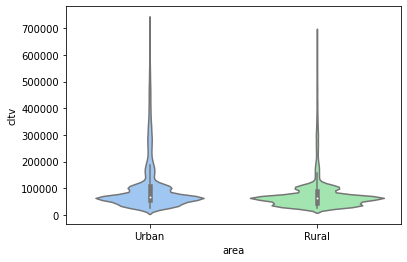

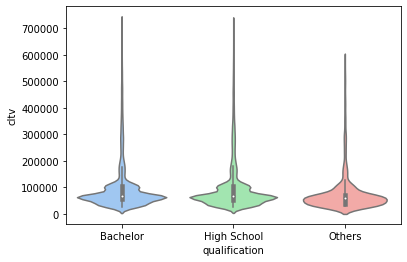

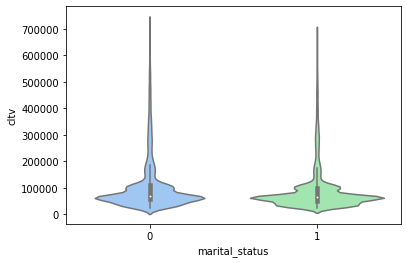

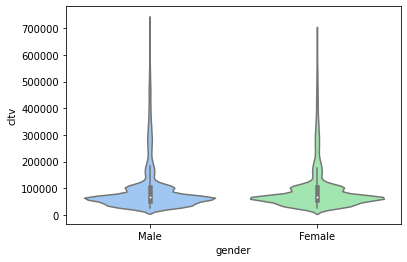

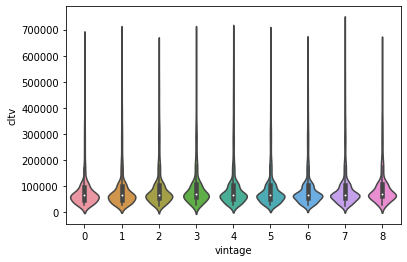

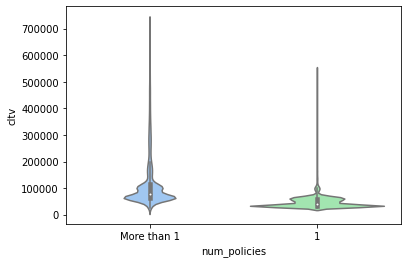

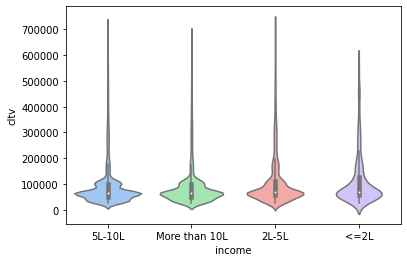

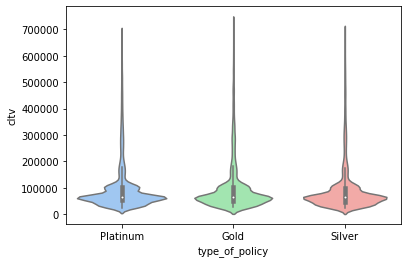

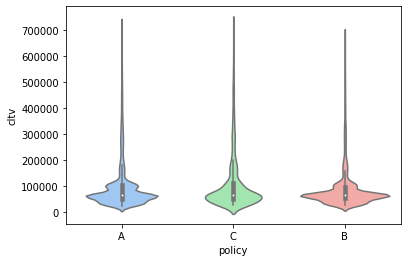

In [11]:
for i in cols:
  sns.violinplot(data = train, x=i, y = 'cltv')
  plt.show()

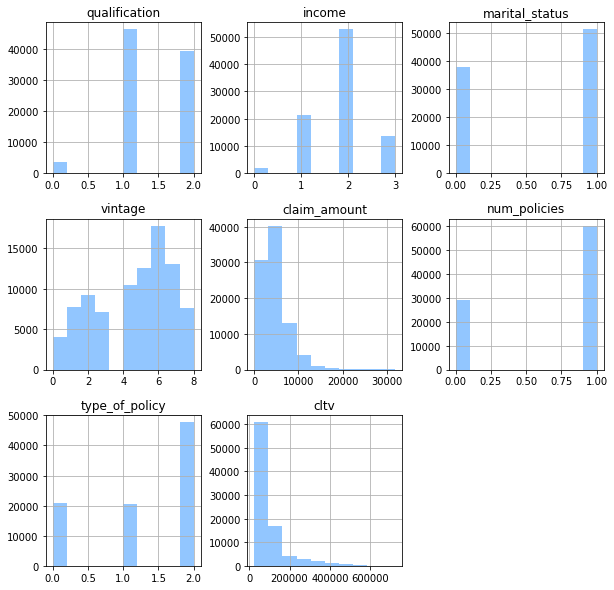

In [54]:
ohepreprocess(train)

In [56]:
oneHot   = pd.get_dummies(train[['gender','area','policy']])
train1 = pd.concat([train.drop(['gender','area','policy'], axis = 1),oneHot], axis = 1)
print('All features are numerical')

All features are numerical


In [35]:
def scale(X):
  global X_scaled
  pt = PowerTransformer()
  rs = RobustScaler()
  sc = rs.fit_transform(pt.fit_transform(X))
  X_scaled = pd.DataFrame(sc, columns = X.columns)
  X_scaled.boxplot(figsize=(10,8))
  plt.xticks(rotation = 90)
  plt.show()
  X_scaled.hist(figsize=(10,10))
  plt.tight_layout()
  plt.show()
  return X_scaled

In [58]:
input = train1.drop('cltv', axis =1)
y = train.cltv

In [59]:
input

,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,gender_Female,gender_Male,area_Rural,area_Urban,policy_A,policy_B,policy_C
id,,,,,,,,,,,,,,
1,2,2,1,5,5790,1,2,0,1,0,1,1,0,0
2,1,2,0,8,5080,1,2,0,1,1,0,1,0,0
3,2,2,1,8,2599,1,2,0,1,0,1,1,0,0
4,1,2,0,7,0,1,2,1,0,1,0,1,0,0
5,1,3,1,6,3508,1,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89388,1,3,0,6,0,1,2,0,1,1,0,0,1,0
89389,2,2,1,0,3897,1,2,0,1,0,1,1,0,0
89390,2,2,0,4,3363,1,2,1,0,0,1,0,1,0


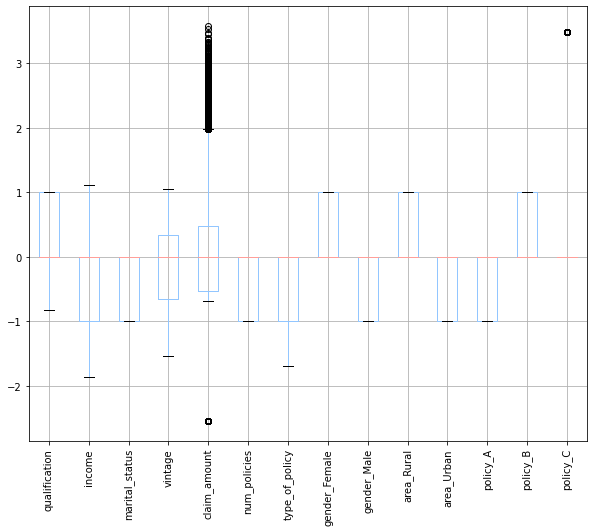

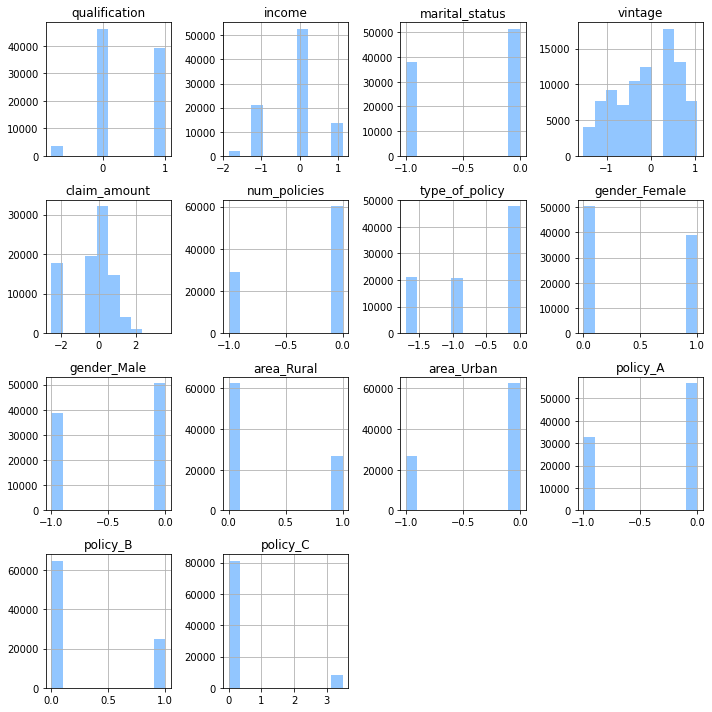

,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,gender_Female,gender_Male,area_Rural,area_Urban,policy_A,policy_B,policy_C
0,1.0,0.000000,0.0,0.000000,0.411487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,-1.0,1.051971,0.249665,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0
2,1.0,0.000000,0.0,1.051971,-0.453721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,-1.0,0.693888,-2.548721,0.0,0.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0
4,0.0,1.107416,0.0,0.342947,-0.163153,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89387,0.0,1.107416,-1.0,0.342947,-2.548721,0.0,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,0.0
89388,1.0,0.000000,0.0,-1.531545,-0.052330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89389,1.0,0.000000,-1.0,-0.333841,-0.206286,0.0,0.0,1.0,-1.0,0.0,0.0,-1.0,1.0,0.0
89390,0.0,-1.000000,-1.0,1.051971,-2.548721,0.0,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,0.0


In [60]:
scale(input)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

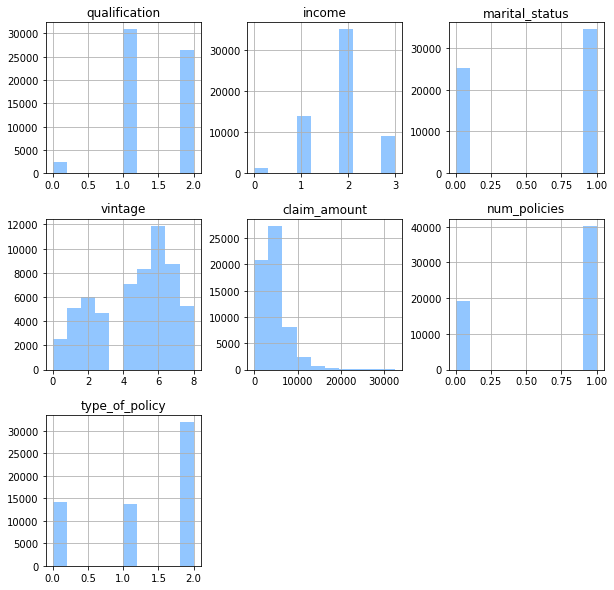

In [62]:
ohepreprocess(test)

In [63]:
oneHot   = pd.get_dummies(test[['gender','area','policy']])
test1 = pd.concat([test.drop(['gender','area','policy'], axis = 1),oneHot], axis = 1)
print('All features are numerical')

All features are numerical


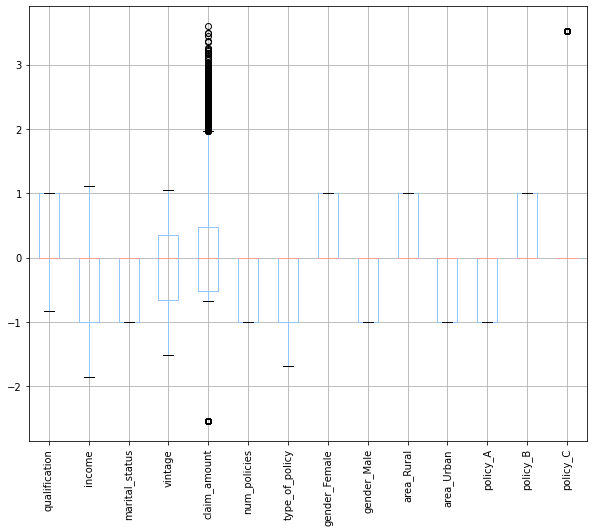

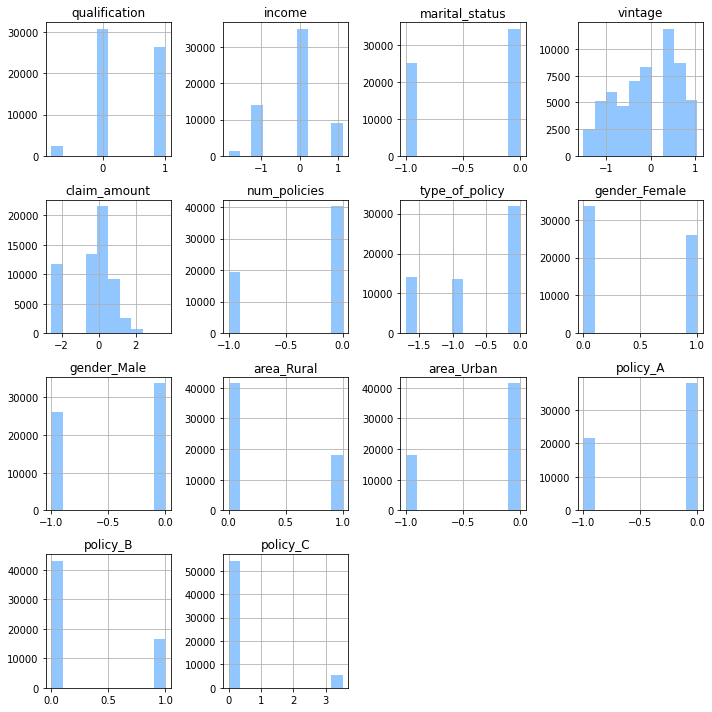

In [64]:
testX = scale(test1)

In [65]:
testX

,qualification,income,marital_status,vintage,claim_amount,num_policies,type_of_policy,gender_Female,gender_Male,area_Rural,area_Urban,policy_A,policy_B,policy_C
0,0.0,0.000000,-1.0,0.343602,-0.627424,0.0,-1.69279,1.0,-1.0,1.0,-1.0,-1.0,1.0,0.000000
1,0.0,-1.000000,-1.0,-0.333868,-0.001067,0.0,0.00000,1.0,-1.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.695762,-0.346442,0.0,-1.00000,0.0,0.0,1.0,-1.0,-1.0,1.0,0.000000
3,1.0,1.110757,0.0,-0.965248,-2.548141,0.0,-1.69279,1.0,-1.0,1.0,-1.0,-1.0,1.0,0.000000
4,0.0,-1.000000,-1.0,0.000000,1.761378,0.0,-1.69279,1.0,-1.0,0.0,0.0,-1.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59590,1.0,0.000000,0.0,0.343602,-2.548141,-1.0,-1.69279,0.0,0.0,1.0,-1.0,0.0,0.0,0.000000
59591,0.0,0.000000,-1.0,0.343602,-2.548141,-1.0,-1.00000,0.0,0.0,0.0,0.0,-1.0,0.0,3.520315
59592,0.0,-1.000000,0.0,-0.333868,-0.221836,0.0,0.00000,1.0,-1.0,0.0,0.0,-1.0,1.0,0.000000
59593,1.0,0.000000,-1.0,-1.256625,-0.359172,0.0,-1.69279,0.0,0.0,1.0,-1.0,0.0,0.0,0.000000


In [66]:
def Model(model):
  model.fit(X_train, y_train)
  y_train_pred = model.predict(X_train)
  print(r2_score(y_train, y_train_pred))
  y_test_pred = model.predict(X_test)
  print(r2_score(y_test, y_test_pred))
  return model.predict(testX)

In [67]:
cltv = Model(gbr())

0.16701903847483113
0.15897761352301842


In [68]:
cltv

array([ 89395.27142155, 129360.98759984,  91814.8501119 , ...,
       106426.60910971, 107979.0928032 , 114636.1492793 ])

In [69]:
test['cltv'] = cltv
sample_submission = test[['cltv']]
sample_submission.to_csv("GradientBoostingohe.csv")

In [70]:
from google.colab import files
files.download("GradientBoostingohe.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>